# This is a script to plot and generate a report for current analysis in a microcontroller development board kit.
Author: Alexandre Nuernberg

Date: 2024/04/13

# MCU: Arduino Uno R3

# Sketch: Blink 1 second with Low Power Library
# See: https://github.com/alexandreberg/PCAM_Performance_Tests/tree/main/Arduino_UNO_R3

# Importing Libraries

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
import locale
import os

# Configure para usar o ponto como separador decimal (por exemplo, padrão dos EUA)
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

'en_US.UTF-8'

# Mounting your Google Drive


In [18]:
# Mounting your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# If needed Unmount the Google Drive comment out the drive.mount linbe and uncomment the following line
#drive.flush_and_unmount() #comment if you not use

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Defining the path and file of database in CSV format

In [19]:
path = "/content/drive/MyDrive/Colab_DBs/blinkLP/"  # Certifique-se da barra no final
file = "Blink_Test_1min_LP.csv"

# Loading the CSV File

In [20]:
#data_file = "/content/drive/MyDrive/Colab_DBs/blinkLP/Blink_Test_1min_LP.csv"
data_file = os.path.join(path, file)
print(data_file)

# Listing drive content:
!ls -l $path

# Create the DataFrame with the csv file downloaded
df = pd.read_csv(data_file)

#Checking if the DB file exists
if os.path.exists(data_file):
    print("File exists!")
else:
    print("File does not exist!")

/content/drive/MyDrive/Colab_DBs/blinkLP/Blink_Test_1min_LP.csv
total 117281
drwx------ 2 root root      4096 Apr 13 21:12 4sec
-rw------- 1 root root 112168962 Apr 13 20:40 Blink_Test_1min_LP.csv
-rw------- 1 root root   6575666 Apr 13 20:40 Blink_Test_4sec_LP.csv
-rw------- 1 root root    302648 Apr 13 21:18 boxplot.png
-rw------- 1 root root       154 Apr 13 21:19 data.txt
-rw------- 1 root root    461505 Apr 13 21:18 histogram.png
-rw------- 1 root root    579621 Apr 13 21:18 linechart.png
File exists!


In [ ]:
# You can use this method if you do not want to share your all drive folder.
# It is safer.

# Just try this method if everything is working fine with the full mount of GD which is simpler to test

# Link for de DB file: Blink_Test_4sec.csv
#file_url = 'https://drive.google.com/uc?export=download&id=1_P9UPbpq97x9oa-tUArgX6Vqqchez0Vf'

# Request to download the db file
#response = requests.get(file_url)

# Create the DataFrame with the csv file downloaded
#df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

# df = pd.read_csv(data_file) # just check if the file is there

# Splitting the "Timestamp" Column

In [21]:
# Assuming timestamps are in milliseconds
df['Timestamp(ms)'] = df['Timestamp(ms)'].astype(int)  # Convert to integers

# Since we only have milliseconds, let's create a simulated 'Date' column
# You can customize the start date if needed
df['Date'] = pd.to_datetime('2024-04-09')

# Convert timestamps from ms to datetime objects for x-axis
df['Time'] = pd.to_datetime(df['Timestamp(ms)'], unit='ms')

print(df.head())

   Timestamp(ms)  Current(uA)       Date       Time
0              0    17530.494 2024-04-09 1970-01-01
1              0    17341.750 2024-04-09 1970-01-01
2              0    17483.295 2024-04-09 1970-01-01
3              0    17766.633 2024-04-09 1970-01-01
4              0    17766.633 2024-04-09 1970-01-01


# Converting the current to (mA)
# !Not working!!!
# TODO

In [22]:
df['Current(mA)'] = df['Current(uA)'] / 1000

print(df.head())

   Timestamp(ms)  Current(uA)       Date       Time  Current(mA)
0              0    17530.494 2024-04-09 1970-01-01    17.530494
1              0    17341.750 2024-04-09 1970-01-01    17.341750
2              0    17483.295 2024-04-09 1970-01-01    17.483295
3              0    17766.633 2024-04-09 1970-01-01    17.766633
4              0    17766.633 2024-04-09 1970-01-01    17.766633


# Creating the Histogram

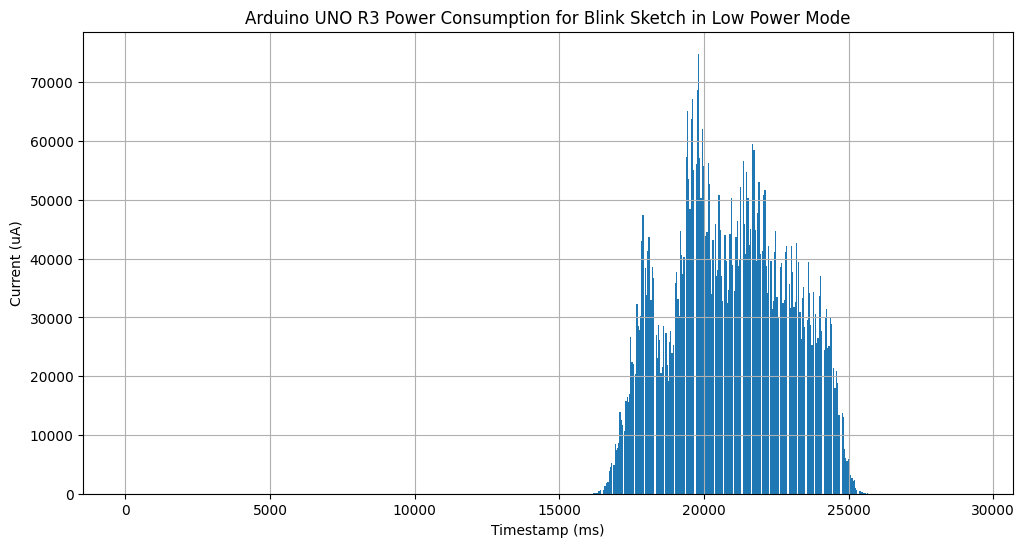

In [52]:
histogram_file = "histogram.png"
fig_full_path =  os.path.join(path, histogram_file)

#from pathlib import Path

#output_path = Path(path)  # Cria um objeto Path a partir da variável 'path'

# Converte vírgulas para pontos
#df['Current(mA)'] = [str(val).replace(',', '.') for val in df['Current(mA)']]

# Crie o histograma
# Criar objeto de figura:
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size (width, height)

#Gerar histograma:
ax.hist(df['Current(uA)'], bins=700)

#Personalizar (títulos, labels, etc):
ax.set_xlabel('Timestamp (ms)')
ax.set_ylabel('Current (uA)')
ax.set_title('Arduino UNO R3 Power Consumption for Blink Sketch in Low Power Mode')
ax.grid(True)

#Salvar a figura:
# Versão com pathlib:
#fig.savefig(output_path / 'histogram.png', dpi=900)
fig.savefig(fig_full_path, dpi=900)

# Creating the Boxplot

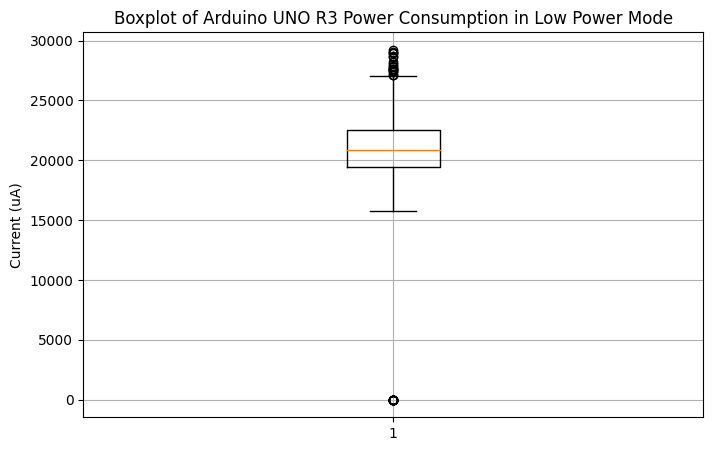

In [55]:
boxplot_file = "boxplot.png"
fig_full_path =  os.path.join(path, boxplot_file)

fig, ax = plt.subplots(figsize=(8, 5))  # Cria a figura e o subplot
plt.boxplot(df['Current(uA)'])
plt.ylabel('Current (uA)')
plt.title('Boxplot of Arduino UNO R3 Power Consumption in Low Power Mode')
plt.grid(True)

fig.savefig(fig_full_path, dpi=900)
plt.show()  # Exibe a figura

# Creating the Line Chart

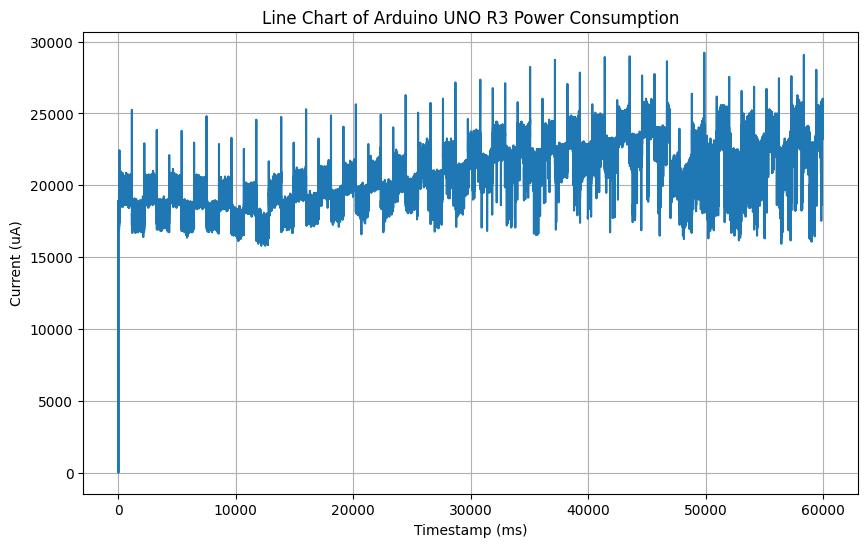

In [56]:
linechart_file = "linechart.png"
fig_full_path =  os.path.join(path, linechart_file)

fig, ax = plt.subplots(figsize=(10,6))  # Cria a figura e o subplot
#plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Timestamp(ms)'], df['Current(uA)'])
plt.xlabel('Timestamp (ms)')
plt.ylabel('Current (uA)')
plt.title('Line Chart of Arduino UNO R3 Power Consumption')
plt.grid(True)
# Versão com pathlib:
#fig.savefig(output_path / 'linechart.png', dpi=900)
fig.savefig(fig_full_path, dpi=900)
plt.show()


# Calculating mean and standard deviation

In [57]:
# Calculating Mean and Standard Deviation

mean_current = df['Current(uA)'].mean()
std_current = df['Current(uA)'].std()
max_current = df['Current(uA)'].max()
min_current = df['Current(uA)'].min()

# Convert to milliamperes
mean_current_mA = mean_current / 1000
std_current_mA = std_current / 1000
max_current_mA = max_current / 1000
min_current_mA = min_current / 1000

# Format with 2 decimal places and units
print("Mean Current: {:.2f} mA".format(mean_current_mA))
print("Standard Deviation of Current: {:.2f} mA".format(std_current_mA))
print("Maximum Current: {:.2f} mA".format(max_current_mA))
print("Minimum Current: {:.2f} mA".format(min_current_mA))

# Calculate the interval time of the analysis (assuming milliseconds, change if needed)
start_time = df['Timestamp(ms)'].iloc[0] / 1000
end_time = df['Timestamp(ms)'].iloc[-1] / 1000
interval_time = end_time - start_time
print("Interval Time of the Analysis: {:.2f} sec".format(interval_time ))



Mean Current: 20.91 mA
Standard Deviation of Current: 2.02 mA
Maximum Current: 29.23 mA
Minimum Current: 0.00 mA
Interval Time of the Analysis: 60.00 sec


In [58]:
# ... seu código existente ...

# Caminho para o arquivo
# Versão com pathlib:
#file_path = output_path / 'data.txt'
file = 'data.txt'
file_path =  os.path.join(path, file)
# Cria a string com os dados formatados
data_content = (
    f"Mean Current: {mean_current_mA:.2f} mA\n"
    f"Standard Deviation of Current: {std_current_mA:.2f} mA\n"
    f"Maximum Current: {max_current_mA:.2f} mA\n"
    f"Minimum Current: {min_current_mA:.2f} mA\n"
    f"Interval Time of the Analysis: {interval_time:.2f} sec\n"
)

# Escreve os dados no arquivo (modo 'w' cria ou sobreescreve o arquivo)
with open(file_path, 'w') as f:
    f.write(data_content)

print("Data saved to", file_path)


Data saved to /content/drive/MyDrive/Colab_DBs/blinkLP/data.txt


# Criando o Relatório em PDF:

# criando um template latex no drive com nome: relatorio.tex



In [ ]:
# Install the fpdf module
!pip install fpdf

#Gere o PDF com FPDF


In [ ]:
# ... seu código Python existente ...

# Import the FPDF library
from fpdf import FPDF

# Create the PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', size=12)

# Read the LaTeX content from the file
with open('/content/drive/MyDrive/Colab_DBs/relatorio.tex', 'r') as f:
    latex_content = f.read()

    # Replace the placeholders with the calculated values
    latex_content = latex_content.replace('[MEAN_CURRENT]', str(mean_current_mA))
    latex_content = latex_content.replace('[STD_CURRENT]', str(std_current_mA))
    # ... outras substituições

# Write the LaTeX content to the PDF
pdf.write(5, latex_content)

# Save the PDF
pdf.output('/content/drive/MyDrive/Colab_DBs/relatorio_Arduino.pdf')


''